In [1]:
from src.dl.inference.inferer import Inferer
import src.dl.lightning as lightning
from src.config import CONFIG

In [2]:
lightning_model = lightning.SegModel.from_experiment(name="encoder_consep", version="efficientnet-b5")

inferer = Inferer(
    lightning_model,
    dataset="kumar",
    patch_size=(256, 256),
    stride_size=80,
    fn_pattern="*",
    data_fold="test",
    model_weights="last",
    apply_weights=True,
    post_proc_method="cellpose",
    batch_size=1,
    num_workers=1
)

concatenate
unet
reduce params:  True
reduce params:  True
reduce params:  True
reduce params:  True
reduce params:  True
reduce params:  True
reduce params:  True
reduce params:  True
reduce params:  True
reduce params:  True
reduce params:  True
reduce params:  True
reduce params:  True
reduce params:  True
reduce params:  True


In [3]:
# lightning_model

In [4]:
inferer.run_inference()

Inference: /home/local/leos/Dippa/datasets/data/kumar/test/images: 100%|██████████| 14/14 [03:05<00:00, 13.25s/batch, patches=4046/4046]


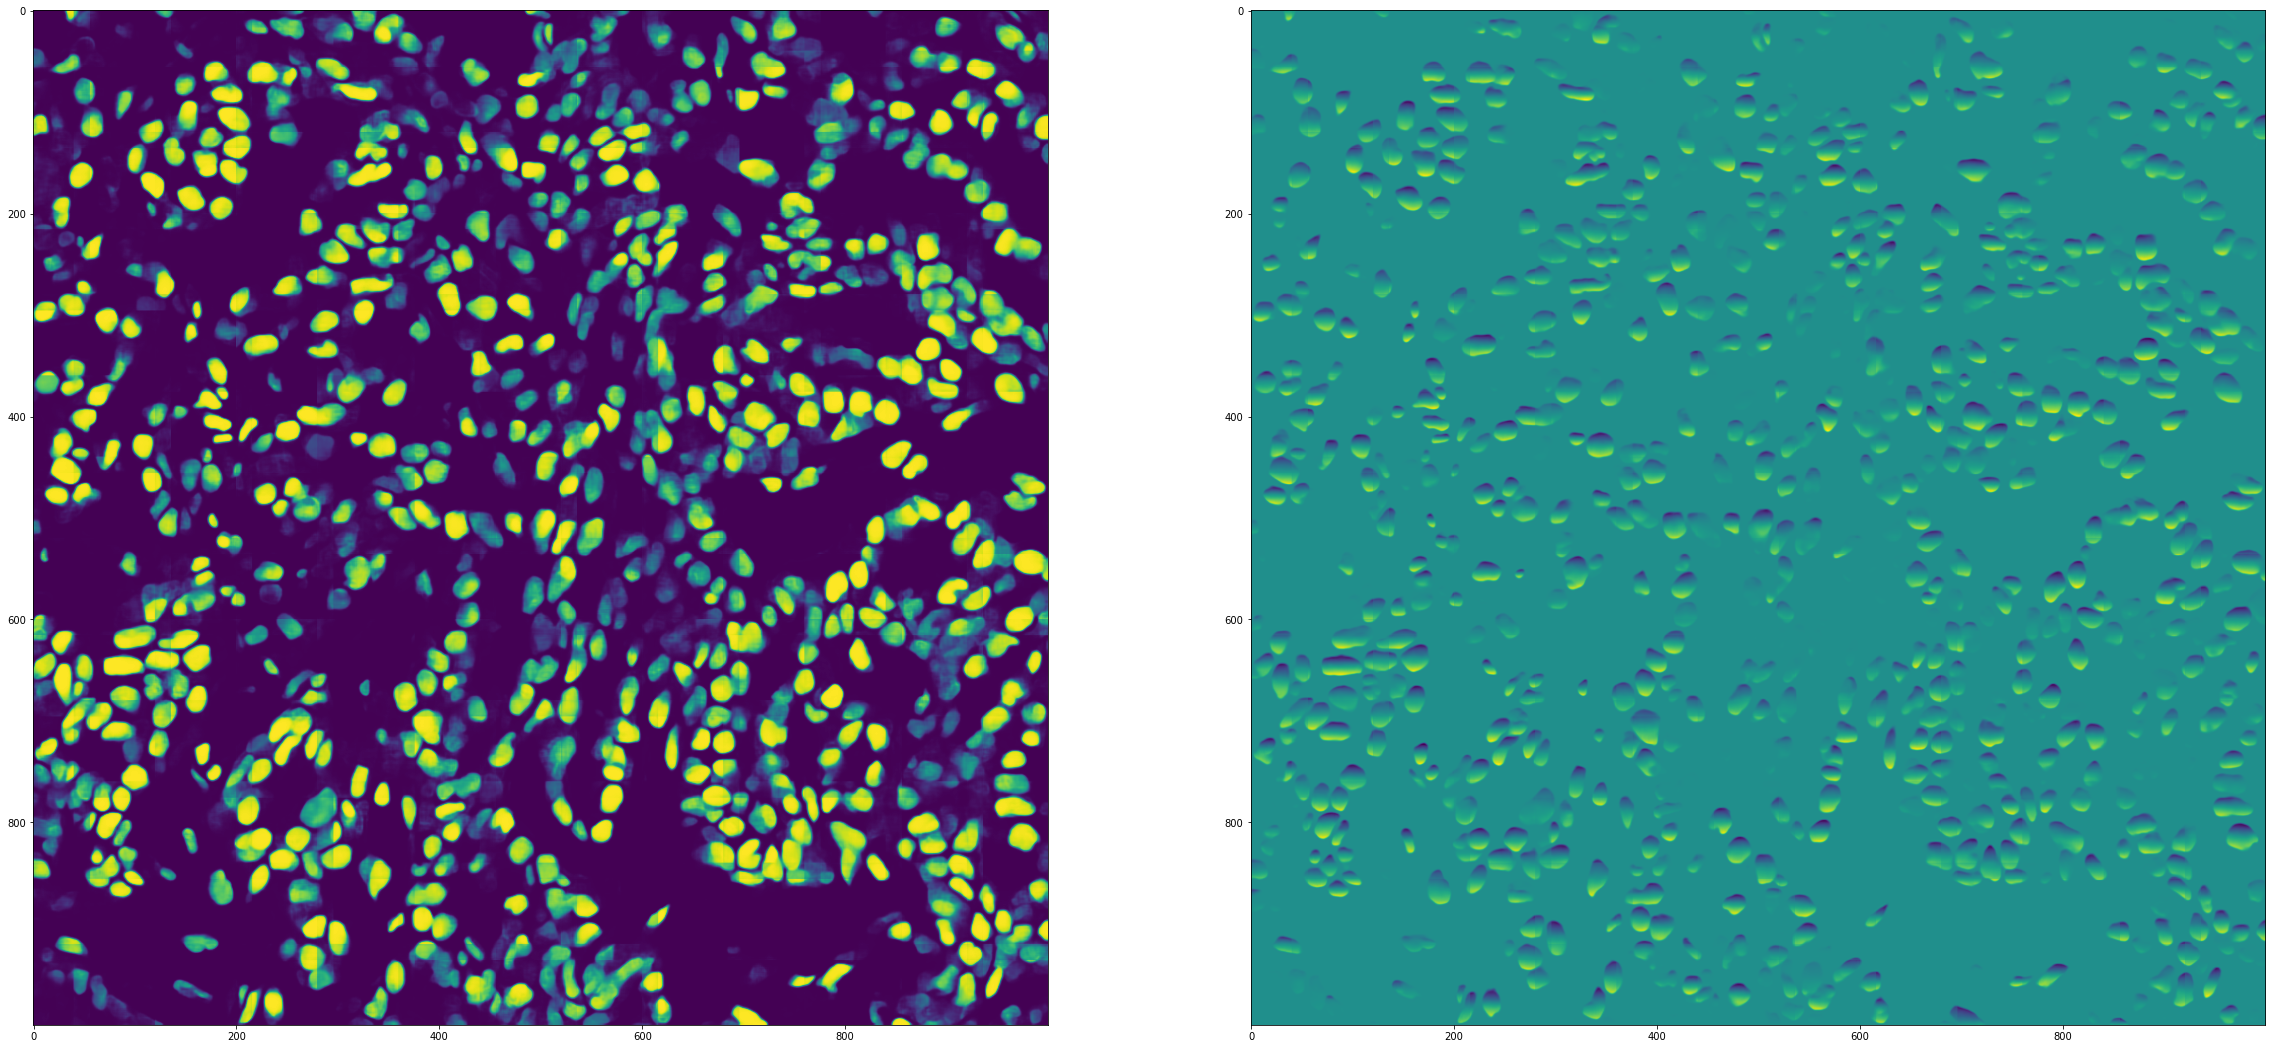

In [5]:
import matplotlib.pyplot as plt 
from skimage.color import label2rgb

# key = "Breast_fold3_420"
# key = "test_11"
key="TCGA-2Z-A9J9-01A-01-TS1"
fig, ax = plt.subplots(1, 2, figsize=(40, 40))
ax[0].imshow(inferer.soft_insts[key][..., 1])
ax[1].imshow(inferer.aux_maps[key][..., 1])
# ax[1].imshow(label2rgb(inferer.inst_maps[key], bg_label=0))

In [6]:
inferer.post_process()

  0%|          | 0/14 [00:00<?, ?it/s]/home/local/leos/Dippa/DippaEnv/lib/python3.6/site-packages/torch/nn/functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
/home/local/leos/Dippa/src/utils/img_utils.py:61: RuntimeWarning: divide by zero encountered in true_divide
  normed = np.clip((im / colmax), a_min=a_min, a_max=a_max)
/home/local/leos/Dippa/src/utils/img_utils.py:61: RuntimeWarning: invalid value encountered in true_divide
  normed = np.clip((im / colmax), a_min=a_min, a_max=a_max)
100%|██████████| 14/14 [00:45<00:00,  3.22s/it]


In [7]:
pattern_list = None
binary_scores = inferer.benchmark_insts(pattern_list=pattern_list, file_prefix="cellpose_efficientnet-b5")
binary_scores

Runnning metrics: 100%|██████████| 14/14 [01:00<00:00,  4.32s/it]


AJI  AJI_plus     DICE2        PQ        SQ  \
name                                                                        
TCGA-2Z-A9J9-01A-01-TS1  0.526045  0.529480  0.703150  0.484716  0.718097   
TCGA-44-2665-01B-06-BS6  0.658421  0.667216  0.686783  0.644633  0.776854   
TCGA-69-7764-01A-01-TS1  0.543882  0.543882  0.664690  0.475369  0.714891   
TCGA-A6-6782-01A-01-BS1  0.538145  0.544085  0.710541  0.488047  0.707060   
TCGA-AC-A2FO-01A-01-TS1  0.137852  0.137611  0.496299  0.102655  0.598283   
TCGA-AO-A0J2-01A-01-BSA  0.042887  0.042887  0.551588  0.063799  0.639514   
TCGA-CU-A0YN-01A-02-BSB  0.419686  0.420246  0.691004  0.447737  0.717348   
TCGA-EJ-A46H-01A-03-TSC  0.596095  0.597312  0.762636  0.571229  0.748038   
TCGA-FG-A4MU-01B-01-TS1  0.531464  0.534404  0.690099  0.488264  0.720303   
TCGA-GL-6846-01A-01-BS1  0.539894  0.539894  0.656643  0.469558  0.723327   
TCGA-HC-7209-01A-01-TS1  0.545221  0.546690  0.670700  0.489264  0.748489   
TCGA-HT-8564-01Z-00-DX1  0.337274  0.337084  0.613311  0.270557  0.664233   
TCGA-IZ-8196-01A-01-BS1  0.529772  0.530931  0.718283  0.474552  0.705681   
TCGA-ZF-A9R5-01A-01-TS1  0.470779  0.470893  0.758452  0.492522  0.753964   
averages_for_the_set     0.458387  0.460187  0.669584  0.425922  0.709720   

                               DQ  inst_recall  inst_precision    splits  \
name                                                                       
TCGA-2Z-A9J9-01A-01-TS1  0.675000     0.704348        0.648000  0.738647   
TCGA-44-2665-01B-06-BS6  0.829799     0.932763        0.747307  0.918249   
TCGA-69-7764-01A-01-TS1  0.664953     0.879819        0.534435  0.864802   
TCGA-A6-6782-01A-01-BS1  0.690249     0.818594        0.596694  0.688233   
TCGA-AC-A2FO-01A-01-TS1  0.171582     0.122841        0.284444  0.154663   
TCGA-AO-A0J2-01A-01-BSA  0.099762     0.058989        0.323077  0.050806   
TCGA-CU-A0YN-01A-02-BSB  0.624156     0.614476        0.634146  0.468561   
TCGA-EJ-A46H-01A-03-TSC  0.763636     0.901288        0.662461  0.749276   
TCGA-FG-A4MU-01B-01-TS1  0.677859     0.694624        0.661885  0.420324   
TCGA-GL-6846-01A-01-BS1  0.649165     0.766197        0.563147  0.522166   
TCGA-HC-7209-01A-01-TS1  0.653670     0.876923        0.521024  0.815411   
TCGA-HT-8564-01Z-00-DX1  0.407323     0.357430        0.473404  0.138637   
TCGA-IZ-8196-01A-01-BS1  0.672474     0.724203        0.627642  0.517288   
TCGA-ZF-A9R5-01A-01-TS1  0.653244     0.614737        0.696897  0.320436   
averages_for_the_set     0.588062     0.647659        0.569612  0.526250   

                           merges  
name                               
TCGA-2Z-A9J9-01A-01-TS1  1.133023  
TCGA-44-2665-01B-06-BS6  0.829400  
TCGA-69-7764-01A-01-TS1  0.912560  
TCGA-A6-6782-01A-01-BS1  0.682163  
TCGA-AC-A2FO-01A-01-TS1  2.858694  
TCGA-AO-A0J2-01A-01-BSA  2.711809  
TCGA-CU-A0YN-01A-02-BSB  1.730583  
TCGA-EJ-A46H-01A-03-TSC  0.584286  
TCGA-FG-A4MU-01B-01-TS1  1.270597  
TCGA-GL-6846-01A-01-BS1  0.978826  
TCGA-HC-7209-01A-01-TS1  0.516829  
TCGA-HT-8564-01Z-00-DX1  0.833152  
TCGA-IZ-8196-01A-01-BS1  1.274865  
TCGA-ZF-A9R5-01A-01-TS1  1.335886  
averages_for_the_set     1.260905

In [8]:
pattern_list = None
type_scores = inferer.benchmark_types(pattern_list=pattern_list, file_prefix="cellpose_efficientnet-b5")
type_scores = type_scores[type_scores.index.str.contains("avg")]
type_scores

Running metrics for spindle: 100%|██████████| 14/14 [00:28<00:00,  2.03s/it]


AJI  AJI_plus     DICE2        PQ  \
name                                                                   
miscellanous_avg_for_the_set  0.076439  0.076382  0.386306  0.078439   
inflammatory_avg_for_the_set  0.424113  0.426909  0.802150  0.487141   
epithelial_avg_for_the_set    0.545409  0.589144  0.472351  0.505898   
spindle_avg_for_the_set       0.383290  0.394511  0.627542  0.380769   

                                    SQ        DQ  inst_recall  inst_precision  \
name                                                                            
miscellanous_avg_for_the_set  0.436574  0.100985     0.068440        0.289712   
inflammatory_avg_for_the_set  0.844367  0.577587     0.592968        0.678277   
epithelial_avg_for_the_set    0.777510  0.647737     0.653522        0.651723   
spindle_avg_for_the_set       0.764954  0.501971     0.526161        0.499901   

                                splits    merges  
name                                              
miscellanous_avg_for_the_set  0.008213  0.095221  
inflammatory_avg_for_the_set  0.078734  0.096057  
epithelial_avg_for_the_set    0.486613  0.413051  
spindle_avg_for_the_set       0.252626  0.304056

In [9]:
type_scores[type_scores.index.str.contains("for_the")].mean()

AJI               0.357313
AJI_plus          0.371737
DICE2             0.572087
PQ                0.363062
SQ                0.705851
DQ                0.457070
inst_recall       0.460273
inst_precision    0.529903
splits            0.206547
merges            0.227096
dtype: float64